In [2]:
#방법 1 은 raw 지금은 젤편한 쉬운방법
import os
home=os.path.expanduser("~")

In [3]:
import findspark
findspark.init(os.path.join(home,"Developer","spark-2.0.0-bin-hadoop2.6"))

In [4]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [8]:
spark.version

u'2.0.0'

In [10]:
myRdd2=spark.sparkContext\
    .textFile(os.path.join("data","ds_spark_wiki.txt"))
print myRdd2.first()

Wikipedia


In [11]:
wc2=myRdd2\
    .flatMap(lambda x:x.split())\
    .map(lambda x:(x,1))\
    .reduceByKey(lambda x,y:x+y)\
    .map(lambda x:(x[1],x[0]))\
    .sortByKey(False)\
    .take(10)

In [13]:
for e in wc2:
    print e

(7, u'Spark')
(6, u'Apache')
(5, u'\uc544\ud30c\uce58')
(4, u'\uc2a4\ud30c\ud06c')
(3, u'the')
(2, u'an')
(1, u'and')
(1, u'\uc18c\uc2a4')
(1, u'is')
(1, u'Wikipedia')


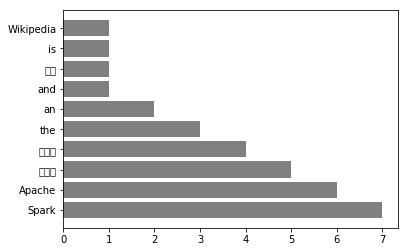

In [14]:
% matplotlib inline
import matplotlib.pyplot as plt

count = map(lambda x: x[0], wc2)
word = map(lambda x: x[1], wc2)
plt.barh(range(len(count)), count, color = 'grey')
plt.yticks(range(len(count)), word)
plt.show()

In [15]:
%%writefile src/ds_spark_rdd_hello.py
#!/usr/bin/env python
# -*- coding: UTF-8 -*-
import pyspark
def doIt():
    print "---------RESULT-----------"
    print spark.version
    spark.conf.set("spark.logConf","false")
    rdd=spark.sparkContext.parallelize(range(1000), 10)
    print "mean=",rdd.mean()
    nums = spark.sparkContext.parallelize([1, 2, 3, 4])
    squared = nums.map(lambda x: x * x).collect()
    for num in squared:
        print "%i " % (num)

if __name__ == "__main__":
    myConf=pyspark.SparkConf()
    spark = pyspark.sql.SparkSession.builder\
        .master("local")\
        .appName("myApp")\
        .config(conf=myConf)\
        .getOrCreate()
    doIt()
    spark.stop()

Writing src/ds_spark_rdd_hello.py


In [24]:
!/Users/jwh/Developer/spark-2.0.0-bin-hadoop2.6/bin/spark-submit src/ds_spark_rdd_hello.py

17/05/23 16:44:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
17/05/23 16:44:06 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
17/05/23 16:44:06 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
---------RESULT-----------
2.0.0
 499.5                                                                          
1 
4 
9 
16 


In [25]:
myList=[('1','kim, js',170),
        ('1','lee, sm', 175),
        ('2','lim, yg',180),
        ('2','lee',170)]
myDf=spark.createDataFrame(myList)

In [26]:
myDf.printSchema()
print myDf.take(1)

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: long (nullable = true)

[Row(_1=u'1', _2=u'kim, js', _3=170)]


In [ ]:
# [] : 리스트
# () : 튜플


In [27]:
names = ["kim","lee","lee","lim"]
items = ["espresso","latte","americano","affocato","long black","macciato"]

In [28]:
df = spark.createDataFrame([(names[i%4], items[i%5]) for i in range(100)],\
                           ["name","item"])
df.show(10)

+----+----------+
|name|      item|
+----+----------+
| kim|  espresso|
| lee|     latte|
| lee| americano|
| lim|  affocato|
| kim|long black|
| lee|  espresso|
| lee|     latte|
| lim| americano|
| kim|  affocato|
| lee|long black|
+----+----------+
only showing top 10 rows



In [29]:
from pyspark.sql import Row
Person = Row('year','name', 'height')
row1=Person('1','kim, js',170)
print "row1: ",row1.year, row1.name

row1:  1 kim, js


In [30]:
print myDf.printSchema()
myDf.show()

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: long (nullable = true)

None
+---+-------+---+
| _1|     _2| _3|
+---+-------+---+
|  1|kim, js|170|
|  1|lee, sm|175|
|  2|lim, yg|180|
|  2|    lee|170|
+---+-------+---+



In [31]:
from pyspark.sql import Row

myList=[('1','kim, js',170),('1','lee, sm', 175),('2','lim, yg',180),('2','lee',170)]
myRdd = spark.sparkContext.parallelize(myList)

In [32]:
rddDf=myRdd.toDF()
rddDf.printSchema()

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: long (nullable = true)



In [33]:
rddDf=spark.createDataFrame(myRdd)
rddDf.printSchema()

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: long (nullable = true)



In [34]:
rddDf.where(rddDf._3 < 175)\
    .select([rddDf._1, rddDf._2]).show()
rddDf.groupby(rddDf._1).max().show()

+---+-------+
| _1|     _2|
+---+-------+
|  1|kim, js|
|  2|    lee|
+---+-------+

+---+-------+
| _1|max(_3)|
+---+-------+
|  1|    175|
|  2|    180|
+---+-------+



In [36]:
%%writefile data/ds_spark.csv
1,2,3,4
11,22,33,44
111,222,333,444

Writing data/ds_spark.csv


In [37]:
df = spark.read.format('com.databricks.spark.csv')\
    .options(header='true', inferschema='true').load('data/ds_spark.csv')
df.show()

+---+---+---+---+
|  1|  2|  3|  4|
+---+---+---+---+
| 11| 22| 33| 44|
|111|222|333|444|
+---+---+---+---+



In [5]:
from pyspark.sql import Row
cfile= os.path.join(os.environ["SPARK_HOME"],\
           "examples/src/main/resources/people.txt")
lines = spark.sparkContext.textFile(cfile)
parts = lines.map(lambda l: l.split(","))
people = parts.map(lambda p: Row(name=p[0], age=int(p[1].strip())))

_myDf = spark.createDataFrame(people)
_myDf.printSchema()
_myDf.collect()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



[Row(age=29, name=u'Michael'),
 Row(age=30, name=u'Andy'),
 Row(age=19, name=u'Justin')]

In [6]:
%%writefile data/ds_spark.csv
1,2,3,4
11,22,33,44
111,222,333,444

Overwriting data/ds_spark.csv


In [7]:
df = spark.read.format('com.databricks.spark.csv')\
    .options(header='true', inferschema='true').load('data/ds_spark.csv')
df.show()

+---+---+---+---+
|  1|  2|  3|  4|
+---+---+---+---+
| 11| 22| 33| 44|
|111|222|333|444|
+---+---+---+---+



In [8]:
import numpy as np
np.array([float(x) for x in '1.658985	4.285136'.split('\t')])

array([ 1.658985,  4.285136])

In [9]:
import numpy as np
np.array([float(x) for x in '1.658985 4.285136'.split(' ')])

array([ 1.658985,  4.285136])

In [10]:
%%writefile data/ds_spark_heightweight.txt
1	65.78	112.99
2	71.52	136.49
3	69.40	153.03
4	68.22	142.34
5	67.79	144.30
6	68.70	123.30
7	69.80	141.49
8	70.01	136.46
9	67.90	112.37
10	66.78	120.67
11	66.49	127.45
12	67.62	114.14
13	68.30	125.61
14	67.12	122.46
15	68.28	116.09
16	71.09	140.00
17	66.46	129.50
18	68.65	142.97
19	71.23	137.90
20	67.13	124.04
21	67.83	141.28
22	68.88	143.54
23	63.48	97.90
24	68.42	129.50
25	67.63	141.85
26	67.21	129.72
27	70.84	142.42
28	67.49	131.55
29	66.53	108.33
30	65.44	113.89
31	69.52	103.30
32	65.81	120.75
33	67.82	125.79
34	70.60	136.22
35	71.80	140.10
36	69.21	128.75
37	66.80	141.80
38	67.66	121.23
39	67.81	131.35
40	64.05	106.71
41	68.57	124.36
42	65.18	124.86
43	69.66	139.67
44	67.97	137.37
45	65.98	106.45
46	68.67	128.76
47	66.88	145.68
48	67.70	116.82
49	69.82	143.62
50	69.09	134.93

Writing data/ds_spark_heightweight.txt


In [14]:
from pyspark.sql.types import *
rdd=spark.sparkContext\
    .textFile(os.path.join('data','ds_spark_heightweight.txt'))

tRdd=rdd.map(lambda x:x.split('\t'))
tDf=spark.createDataFrame(tRdd)

In [15]:
tDf.printSchema()

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: string (nullable = true)



In [17]:
tDf.take(1)



[Row(_1=u'1', _2=u'65.78', _3=u'112.99')]

In [18]:
# 그냥 컬럼없이하면 탭이기때문에 문자라서 평균도 못내고 아무것도 못함
tDf=tDf.withColumn("id",tDf['_1'].cast("integer")).drop('_1')
tDf=tDf.withColumn("height",tDf['_2'].cast("double")).drop('_2')
tDf=tDf.withColumn("weight",tDf['_3'].cast("double")).drop('_3')

In [19]:
tDf.take(1)

[Row(id=1, height=65.78, weight=112.99)]

In [20]:
import numpy as np
_weightRdd=tDf.rdd.map(lambda fields:fields[1]).collect()
_heightRdd=tDf.rdd.map(lambda fields:fields[2]).collect()
print np.array(_weightRdd)[:5]
print np.array(_heightRdd)[:5]


[ 65.78  71.52  69.4   68.22  67.79]
[ 112.99  136.49  153.03  142.34  144.3 ]


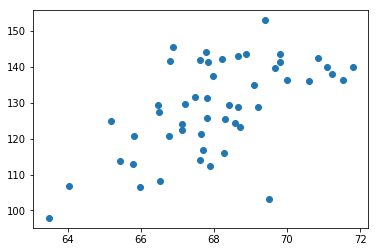

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.array(_weightRdd), np.array(_heightRdd),'o')
plt.show()